In [1]:
import pandas as pd
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np


In [2]:
data = pd.read_csv("INFLUD21-01-05-2023.csv", sep=';', low_memory=False)
#pd.set_option('display.max_columns', None)
data.head()


,DT_NOTIFIC,SEM_NOT,DT_SIN_PRI,SEM_PRI,SG_UF_NOT,ID_REGIONA,CO_REGIONA,ID_MUNICIP,CO_MUN_NOT,ID_UNIDADE,...,DOSE_2_COV,DOSE_REF,FAB_COV_1,FAB_COV_2,FAB_COVREF,LOTE_REF,LAB_PR_COV,LOTE_1_COV,LOTE_2_COV,FNT_IN_COV
0,06/01/2021,1,06/01/2021,1,BA,NUCLEO REGIONAL DE SAUDE NORDESTE,1382.0,ALAGOINHAS,290070,HOSPITAL REGIONAL DANTAS BIAO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,08/01/2021,1,03/01/2021,1,BA,NUCLEO REGIONAL DE SAUDE SUL,1385.0,ITABUNA,291480,HOSPITAL CALIXTO MIDLEJ FILHO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,09/01/2021,1,07/01/2021,1,PR,02RS METROPOLITANA,1356.0,CURITIBA,410690,COMPLEXO HOSPITALAR DO TRABALHADOR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,06/01/2021,1,05/01/2021,1,PR,17RS LONDRINA,1371.0,LONDRINA,411370,HCL HOSPITAL DO CANCER DE LONDRINA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11/01/2021,2,04/01/2021,1,RS,007 CRS,1596.0,DOM PEDRITO,430660,HOSPITAL SAO LUIZ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


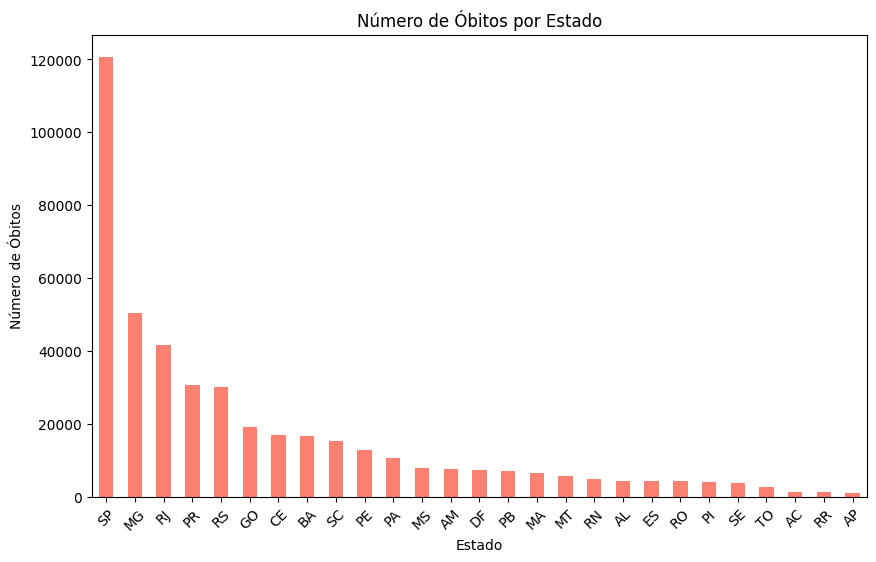

In [3]:
obitos_df = data[data['EVOLUCAO'] == 2]
obitos_por_estado = obitos_df['SG_UF_NOT'].value_counts()
plt.figure(figsize=(10, 6))
obitos_por_estado.plot(kind='bar', color='salmon')
plt.title('Número de Óbitos por Estado')
plt.xlabel('Estado')
plt.ylabel('Número de Óbitos')
plt.xticks(rotation=45)  # Rotacionar os nomes dos estados para melhor visualização
plt.show()

In [4]:
data = data.fillna(0)

#data_r = pd.get_dummies(data_r)
#data_r = data[(data["FADIGA"].isnull() == False) &
 #           (data["PERD_OLFT"].isnull() == False) &
  #          (data["PERD_PALA"].isnull() == False) &
   #         (data["ASMA"].isnull() == False)]

# display(data_r.columns.to_list())

In [5]:
colunas_interece = ['CS_SEXO', 'NU_IDADE_N', 'NOSOCOMIAL', 'FEBRE', 'TOSSE', 'GARGANTA', 'DISPNEIA', 'DESC_RESP', 'SATURACAO','FADIGA', 'PERD_OLFT', 'PERD_PALA',
                  'UTI', 'CLASSI_FIN','EVOLUCAO']
data_r = data[colunas_interece]


mudar o dado de M e F de CS_SEXO para valores de 0, 1 e 2 respectivamente.

In [6]:
data_r["CS_SEXO"] = data_r["CS_SEXO"].map({'M': 1, 'F': 0})


data_r["CS_SEXO"] = data_r['CS_SEXO'].fillna(2)

C:\Users\Joao victor\AppData\Local\Temp\ipykernel_11088\2856805980.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_r["CS_SEXO"] = data_r["CS_SEXO"].map({'M': 1, 'F': 0})
C:\Users\Joao victor\AppData\Local\Temp\ipykernel_11088\2856805980.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_r["CS_SEXO"] = data_r['CS_SEXO'].fillna(2)


In [7]:
print(data_r['CS_SEXO'].unique())  # Verificar valores únicos na coluna
print(data_r.head())  # Inspecionar o DataFrame


[1. 0. 2.]
   CS_SEXO  NU_IDADE_N  NOSOCOMIAL  FEBRE  TOSSE  GARGANTA  DISPNEIA  \
0      1.0          69         0.0    2.0    2.0       2.0       1.0   
1      1.0          89         0.0    0.0    0.0       0.0       1.0   
2      0.0          51         2.0    0.0    0.0       0.0       1.0   
3      1.0          57         2.0    2.0    2.0       2.0       1.0   
4      1.0          81         2.0    1.0    1.0       1.0       1.0   

   DESC_RESP  SATURACAO  FADIGA  PERD_OLFT  PERD_PALA  UTI  CLASSI_FIN  \
0        2.0        2.0     2.0        2.0        2.0  1.0         3.0   
1        1.0        1.0     0.0        0.0        0.0  1.0         5.0   
2        0.0        0.0     0.0        0.0        0.0  1.0         4.0   
3        1.0        1.0     2.0        2.0        2.0  2.0         4.0   
4        1.0        1.0     1.0        2.0        2.0  1.0         5.0   

   EVOLUCAO  
0       2.0  
1       2.0  
2       1.0  
3       3.0  
4       2.0  


In [8]:
data_r = data_r[colunas_interece]

In [9]:
#data_r['sexo'] = (
    #data_r['CS_SEXO_F'].astype(int) * 0.0 +    # Feminino = 0.0
    #data_r['CS_SEXO_M'].astype(int) * 1.0 +    # Masculino = 1.0
    #data_r['CS_SEXO_I'].astype(int) * 2.0      # Não identificado = 2.0
#)

# Remover as colunas booleanas de sexo, se não forem mais necessárias
#data_r = data_r.drop(columns=['CS_SEXO_F', 'CS_SEXO_I', 'CS_SEXO_M'])

# Visualizar o resultado
#print(data_r.head())

In [10]:
data_r.head(5)

,CS_SEXO,NU_IDADE_N,NOSOCOMIAL,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,SATURACAO,FADIGA,PERD_OLFT,PERD_PALA,UTI,CLASSI_FIN,EVOLUCAO
0,1.0,69,0.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,2.0
1,1.0,89,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,5.0,2.0
2,0.0,51,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,1.0
3,1.0,57,2.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,4.0,3.0
4,1.0,81,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,5.0,2.0


In [11]:
data_r = data_r[data_r['CLASSI_FIN'] != 5.0]
data_r = data_r[data_r['EVOLUCAO'] != 3.0]

print(data_r['CLASSI_FIN'].unique)

<bound method Series.unique of 0          3.0
2          4.0
8          4.0
10         4.0
12         4.0
          ... 
1731283    4.0
1731284    4.0
1731285    1.0
1731287    4.0
1731288    4.0
Name: CLASSI_FIN, Length: 499958, dtype: float64>


In [12]:
#X = pd.DataFrame(columns=colunas_interece, data=data_r)
X = pd.DataFrame(columns= ['CS_SEXO', 'NU_IDADE_N', 'NOSOCOMIAL', 'FEBRE', 'TOSSE', 'GARGANTA', 'DISPNEIA', 'DESC_RESP', 'SATURACAO','FADIGA', 'PERD_OLFT', 'PERD_PALA',
                  'UTI', 'CLASSI_FIN'],data=data_r)
print(len(X))

499958


In [13]:
y = pd.DataFrame(columns=['EVOLUCAO'], data= data_r)
print(len(y))

499958


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [15]:
X_train = X_train.dropna()
y_train = y_train.loc[X_train.index]  # Para garantir que os rótulos fiquem alinhados.


In [16]:
Logit = LogisticRegression(verbose=1, max_iter=1000)
Logit.fit(X_train, np.ravel(y_train, order='C'))
y_pred = Logit.predict(X_test)

In [17]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

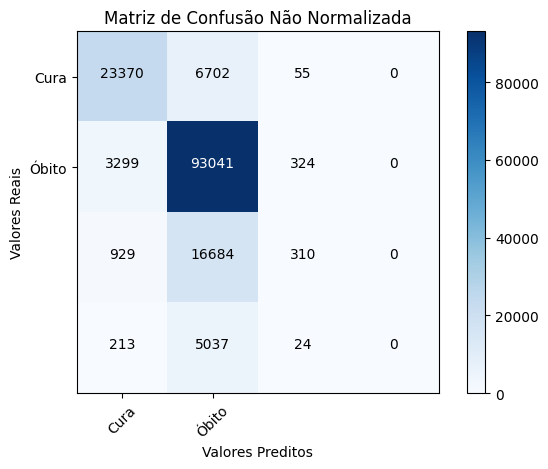

In [18]:
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
import itertools

# Calculando uma matriz de confusão para observar se o modelo está correto
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

# Função para plotar a matriz de confusão
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    Esta função imprime e plota a matriz de confusão.
    A normalização pode ser aplicada definindo `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Valores Reais')
    plt.xlabel('Valores Preditos')
    plt.tight_layout()

# Imprimindo a matriz de confusão
plot_confusion_matrix(cnf_matrix, classes=['Cura', 'Óbito'],
                      title='Matriz de Confusão Não Normalizada', normalize=False)
plt.show()


In [19]:
from sklearn import metrics
import numpy as np

# Identificar as classes únicas em y_test
classes = np.unique(y_test)
print("Classes únicas em y_test:", classes)

# Definir target_names com base nas classes
target_names = [str(int(c)) for c in classes]

# Imprimir o relatório de classificação com os nomes corretos
print(metrics.classification_report(y_test, y_pred, target_names=target_names))


Classes únicas em y_test: [0. 1. 2. 9.]
              precision    recall  f1-score   support

           0       0.84      0.78      0.81     30127
           1       0.77      0.96      0.85     96664
           2       0.43      0.02      0.03     17923
           9       0.00      0.00      0.00      5274

    accuracy                           0.78    149988
   macro avg       0.51      0.44      0.42    149988
weighted avg       0.71      0.78      0.72    149988



C:\Users\Joao victor\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Joao victor\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Joao victor\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\met

In [20]:
print(cnf_matrix)

[[23370  6702    55     0]
 [ 3299 93041   324     0]
 [  929 16684   310     0]
 [  213  5037    24     0]]


In [21]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)

C:\Users\Joao victor\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=4)

In [22]:
X_new = np.array([[1,1,1,1,1,1,1,1,1,1,1,1,1,1]])
X_new.shape
prediction = knn.predict(X_new)
prediction

C:\Users\Joao victor\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1.])

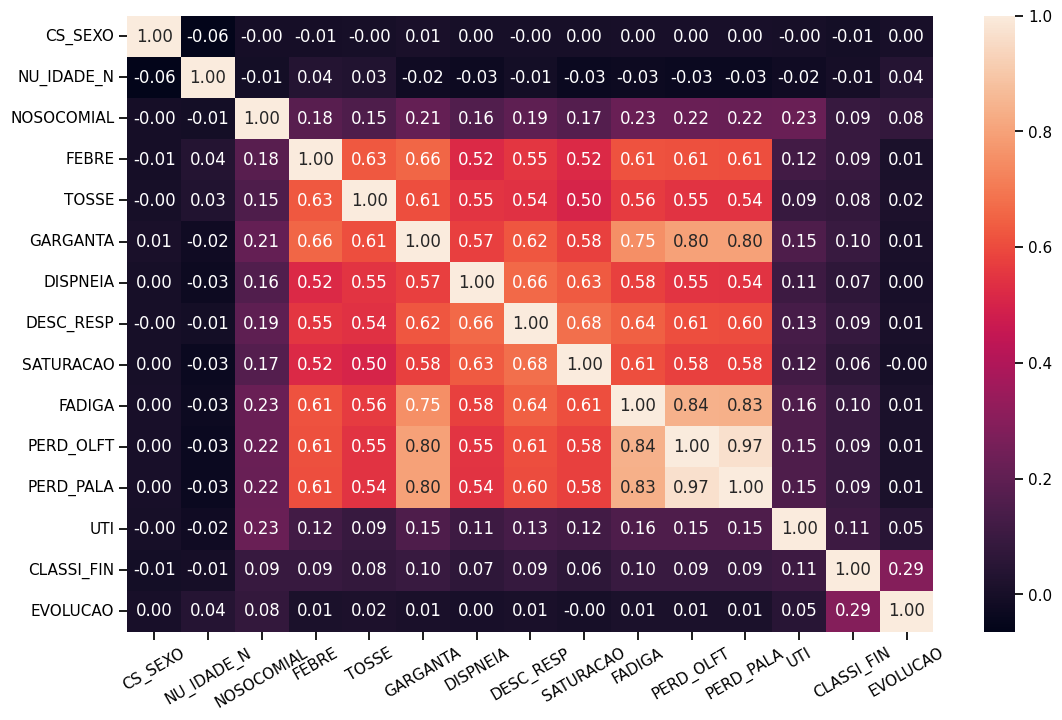

In [23]:
corr = data_r.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,8))
mask = np.zeros_like(corr)
a = sns.heatmap(corr, mask = mask, annot = True, fmt = '.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=30)

In [24]:
knn.score(X_test, y_test)

0.7600808064645171